In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import datasets, linear_model, metrics 
from sklearn.linear_model import LogisticRegression
%matplotlib inline

# linear algorithm

Estimated coefficients:b_0 = 1.0105778100724256  b_1 = -0.004177184554036274


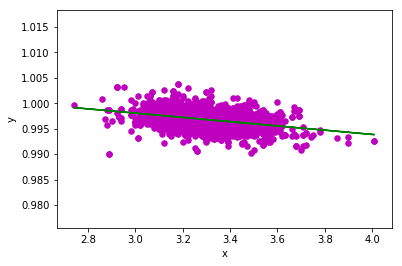

In [127]:
drw = pd.read_csv(r"C:\Users\Sachin Koradiya\Downloads\kaggle_data\red-wine-quality-cortez-et-al-2009\winequality-red.csv")
drw.head(10)
#ww.isnull().sum()
  
def estimate_coef(x, y):  
    n = np.size(x) 
  
    m_x, m_y = np.mean(x), np.mean(y) 
   
    SS_xy = np.sum(y*x) - n*m_y*m_x 
    SS_xx = np.sum(x*x) - n*m_x*m_x 

    b_1 = SS_xy / SS_xx 
    b_0 = m_y - b_1*m_x 
  
    return(b_0, b_1) 
  
def plot_regression_line(x, y, b): 

    plt.scatter(x, y, color = "m", 
               marker = "o", s = 30) 
  
    y_pred = b[0] + b[1]*x 
   
    plt.plot(x, y_pred, color = "g") 
    plt.xlabel('x') 
    plt.ylabel('y') 
    plt.show() 

def main(): 
     
    x = drw['pH'].values
    y = drw['density'].values
  
    b = estimate_coef(x, y) 
    print("Estimated coefficients:b_0 = {}  b_1 = {}".format(b[0], b[1])) 
  
    plot_regression_line(x, y, b) 

if __name__ == "__main__": 
    main()

Coefficients: 
 [ 4.58303896e-02 -1.23453219e+00 -2.74207810e-01  1.85368781e-02
 -1.62453082e+00  5.90389611e-03 -3.60652615e-03 -3.29180975e+01
 -3.36079865e-01  8.36658076e-01  2.61971065e-01]
Variance score: 0.34047681676226244


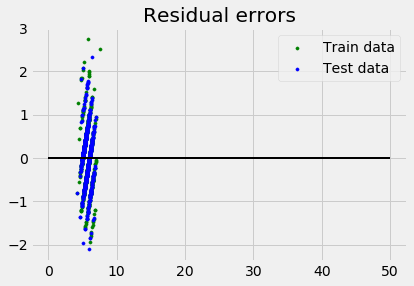

In [128]:
import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd
from sklearn import datasets, linear_model, metrics 
  
# load the boston dataset 
drw = pd.read_csv(r"C:\Users\Sachin Koradiya\Downloads\kaggle_data\red-wine-quality-cortez-et-al-2009\winequality-red.csv") 
  
# defining feature matrix(X) and response vector(y) 
X = drw.iloc[:,0:-1].values
y = drw.iloc[:,-1].values
  
# splitting X and y into training and testing sets 
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, 
                                                    random_state=1) 
  
# create linear regression object 
reg = linear_model.LinearRegression() 
  
# train the model using the training sets 
reg.fit(X_train, y_train) 
  
# regression coefficients 
print('Coefficients: \n', reg.coef_) 
  
# variance score: 1 means perfect prediction 
print('Variance score: {}'.format(reg.score(X_test, y_test))) 
  
# plot for residual error 
  
## setting plot style 
plt.style.use('fivethirtyeight') 
  
## plotting residual errors in training data 
plt.scatter(reg.predict(X_train), reg.predict(X_train) - y_train, 
            color = "green", s = 10, label = 'Train data') 
  
## plotting residual errors in test data 
plt.scatter(reg.predict(X_test), reg.predict(X_test) - y_test, 
            color = "blue", s = 10, label = 'Test data') 
  
## plotting line for zero residual error 
plt.hlines(y = 0, xmin = 0, xmax = 50, linewidth = 2) 
  
## plotting legend 
plt.legend(loc = 'upper right') 
  
## plot title 
plt.title("Residual errors") 
  
## function to show plot 
plt.show() 

In [129]:
from sklearn import linear_model
import math

sr = pd.read_csv(r"C:\Users\Sachin Koradiya\Downloads\kaggle_data\py-master\py-master\ML\2_linear_reg_multivariate\homeprices.csv")
md = sr.bedrooms.mean()
sr.head(10)

sr.bedrooms = sr.bedrooms.fillna(md)
sr.head(10)
reg = linear_model.LinearRegression()
reg.fit(sr[["area","bedrooms","age"]],sr.price)
reg.predict([[50000,3,10]])

array([6084572.63471739])

In [171]:
from sklearn import linear_model
import numpy as np

sdata = pd.read_csv(r"C:\Users\Sachin Koradiya\Downloads\kaggle_data\py-master\py-master\ML\2_linear_reg_multivariate\Exercise\hiring.csv")
sdata.head(10)
tsm = sdata.test_score.mean()
sdata.test_score = sdata.test_score.fillna(tsm)
em = sdata.experience.median()
sdata.experience = sdata.experience.fillna(em)
sdata.head()
reg = linear_model.LinearRegression()
reg.fit(sdata[["experience","test_score","interview_score"]],sdata.salary)
reg.predict([[.5,10,10]])

array([55835.63784523])

# logistic algorithm

In [2]:
dt = pd.read_csv(r"C:\Users\Sachin Koradiya\Downloads\kaggle_data\kaggle-titanic-master\kaggle-titanic-master\input\test.csv")
dt.head()
dt.isnull().sum()
dt.dropna(inplace=True)
#sns.heatmap(dt.isnull())
dt.head()
pclass = pd.get_dummies(dt["Pclass"],drop_first=True)
embarked = pd.get_dummies(dt["Embarked"],drop_first=True)
sex = pd.get_dummies(dt["Sex"],drop_first=True)
dt = pd.concat([dt,pclass,embarked,sex],axis=1)
dt.head()
dt = dt.drop(["Pclass","Name","Age","Embarked","Sex","Cabin","Ticket"],axis=1)
dt.head()
X = dt.iloc[:,1:].values
y = dt.iloc[:,1].values
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state=1) 
reg = linear_model.LogisticRegression() 
reg.fit(X_train, y_train) 
y_pred = reg.predict(X_test) 
print("Logistic Regression model accuracy(in %):",metrics.accuracy_score(y_test, y_pred)*100) 
y_test

Logistic Regression model accuracy(in %): 90.9090909090909


array([0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 3, 1, 0, 0, 0, 2, 0],
      dtype=int64)

In [97]:
dh = pd.read_csv(r"C:\Users\Sachin Koradiya\Downloads\kaggle_data\heart-disease-uci\heart.csv")
dh.dropna(inplace=True)
dh.head()
X = dt.iloc[:,0:-1].values
y = dt.iloc[:,-1].values
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=1) 
reg = linear_model.LogisticRegression() 
reg.fit(X_train, y_train) 
y_pred = reg.predict(X_test) 
print("Logistic Regression model accuracy(in %):",metrics.accuracy_score(y_test, y_pred)*100) 
y_pred

Logistic Regression model accuracy(in %): 44.44444444444444


array([1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1], dtype=uint8)

# knn algorithm

In [126]:
dataset = pd.read_csv(r"C:\Users\Sachin Koradiya\Downloads\kaggle_data\iris-data\Iris.csv")
#dataset = pd.read_csv(r"C:\Users\Sachin Koradiya\Downloads\heart-disease-uci\heart.csv")

X = dataset.iloc[:,:-1].values  
y = dataset.iloc[:, 5].values 
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20) 
from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()  
scaler.fit(X_train)
X_train = scaler.transform(X_train)  
X_test = scaler.transform(X_test)  
from sklearn.neighbors import KNeighborsClassifier  
classifier = KNeighborsClassifier(n_neighbors=5)  
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)  
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred))
print("knn model accuracy(in %):",metrics.accuracy_score(y_test, y_pred)*100)

[[11  0  0]
 [ 0  9  0]
 [ 0  1  9]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       0.90      1.00      0.95         9
 Iris-virginica       1.00      0.90      0.95        10

    avg / total       0.97      0.97      0.97        30

knn model accuracy(in %): 96.66666666666667


# svm algorithm

In [67]:
dataset = pd.read_csv(r"C:\Users\Sachin Koradiya\Downloads\kaggle_data\iris-data\Iris.csv")
X = dataset.drop('Species', axis=1)  
y = dataset['Species']  
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)  
from sklearn.svm import SVC  
svclassifier = SVC(kernel='poly', degree=8)  
svclassifier.fit(X_train, y_train)  
y_pred = svclassifier.predict(X_test) 
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred))  
print("svm model accuracy(in %):",metrics.accuracy_score(y_test, y_pred)*100)

[[13  0  0]
 [ 1  9  0]
 [ 0  0  7]]
                 precision    recall  f1-score   support

    Iris-setosa       0.93      1.00      0.96        13
Iris-versicolor       1.00      0.90      0.95        10
 Iris-virginica       1.00      1.00      1.00         7

    avg / total       0.97      0.97      0.97        30

svm model accuracy(in %): 96.66666666666667


In [84]:
dataset = pd.read_csv(r"C:\Users\Sachin Koradiya\Downloads\kaggle_data\iris-data\Iris.csv")
X = dataset.drop('Species', axis=1)  
y = dataset['Species']  
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20) 
from sklearn.svm import SVC  
svclassifier = SVC(kernel='rbf')  
svclassifier.fit(X_train, y_train)
y_pred = svclassifier.predict(X_test) 
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred))  
print("svm model accuracy(in %):",metrics.accuracy_score(y_test, y_pred)*100)

[[ 9  0  0]
 [ 0 14  1]
 [ 0  0  6]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         9
Iris-versicolor       1.00      0.93      0.97        15
 Iris-virginica       0.86      1.00      0.92         6

    avg / total       0.97      0.97      0.97        30

svm model accuracy(in %): 96.66666666666667


In [101]:
dataset = pd.read_csv(r"C:\Users\Sachin Koradiya\Downloads\kaggle_data\iris-data\Iris.csv")
X = dataset.drop('Species', axis=1)  
y = dataset['Species']  
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20) 
from sklearn.svm import SVC  
svclassifier = SVC(kernel='sigmoid')  
svclassifier.fit(X_train, y_train) 
y_pred = svclassifier.predict(X_test) 
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred))  
print("svm model accuracy(in %):",metrics.accuracy_score(y_test, y_pred)*100)

[[ 0  9  0]
 [ 0  8  0]
 [ 0 13  0]]
                 precision    recall  f1-score   support

    Iris-setosa       0.00      0.00      0.00         9
Iris-versicolor       0.27      1.00      0.42         8
 Iris-virginica       0.00      0.00      0.00        13

    avg / total       0.07      0.27      0.11        30

svm model accuracy(in %): 26.666666666666668


C:\Users\Sachin Koradiya\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# decision tree algorithm

In [5]:
import numpy as np 
import pandas as pd 
from sklearn.metrics import confusion_matrix 
from sklearn.cross_validation import train_test_split 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 
  
def importdata(): 
    balance_data = pd.read_csv(r"C:\Users\Sachin Koradiya\Downloads\kaggle_data\iris-data\Iris.csv")
      
    # Printing the dataswet shape 
    print ("Dataset Lenght: ", len(balance_data)) 
    print ("Dataset Shape: ", balance_data.shape) 
      
    # Printing the dataset obseravtions 
    print ("Dataset: ",balance_data.head()) 
    return balance_data 
  
# Function to split the dataset 
def splitdataset(balance_data): 
  
    # Seperating the target variable 
    X = balance_data.values[:, 1:4] 
    Y = balance_data.values[:, 5] 
  
    # Spliting the dataset into train and test 
    X_train, X_test, y_train, y_test = train_test_split(  
    X, Y, test_size = 0.3, random_state = 100) 
      
    return X, Y, X_train, X_test, y_train, y_test 
      
# Function to perform training with giniIndex. 
def train_using_gini(X_train, X_test, y_train): 
  
    # Creating the classifier object 
    clf_gini = DecisionTreeClassifier(criterion = "gini", 
            random_state = 100,max_depth=3, min_samples_leaf=5) 
  
    # Performing training 
    clf_gini.fit(X_train, y_train) 
    return clf_gini 
       
def prediction(X_test, clf_object): 
  
    # Predicton on test with giniIndex 
    y_pred = clf_object.predict(X_test) 
    print("Predicted values:") 
    print(y_pred) 
    return y_pred 
      
# Function to calculate accuracy 
def cal_accuracy(y_test, y_pred): 
      
    print("Confusion Matrix: ", 
        confusion_matrix(y_test, y_pred)) 
      
    print ("Accuracy : ", 
    accuracy_score(y_test,y_pred)*100) 
      
    print("Report : ", 
    classification_report(y_test, y_pred)) 

def main(): 
      
    # Building Phase 
    data = importdata() 
    X, Y, X_train, X_test, y_train, y_test = splitdataset(data) 
    clf_gini = train_using_gini(X_train, X_test, y_train) 
    
      
    # Operational Phase 
    print("Results Using Gini Index:") 
      
    # Prediction using gini 
    y_pred_gini = prediction(X_test, clf_gini) 
    cal_accuracy(y_test, y_pred_gini)       

if __name__=="__main__": 
    main() 


Dataset Lenght:  150
Dataset Shape:  (150, 6)
Dataset:     Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa
Results Using Gini Index:
Predicted values:
['Iris-virginica' 'Iris-setosa' 'Iris-virginica' 'Iris-setosa'
 'Iris-versicolor' 'Iris-virginica' 'Iris-setosa' 'Iris-setosa'
 'Iris-virginica' 'Iris-setosa' 'Iris-setosa' 'Iris-virginica'
 'Iris-setosa' 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-virginica' 'Iris-virginica' 'Iris-virginica'
 'Iris-virginica' 'Iris-setosa' 'Iris-virginica' 'Iris-setosa'
 'Iris-versicolor' 'Iris-virginica' 'Iris-versicolo

In [102]:
import numpy as np 
import pandas as pd 
from sklearn.metrics import confusion_matrix 
from sklearn.cross_validation import train_test_split 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 
  
balance_data = pd.read_csv(r"C:\Users\Sachin Koradiya\Downloads\kaggle_data\iris-data\Iris.csv")
      
    
print ("Dataset Lenght: ", len(balance_data)) 
print ("Dataset Shape: ", balance_data.shape) 
      
print ("Dataset: ",balance_data.head()) 
    
    
X = balance_data.values[:, 1:4] 
Y = balance_data.values[:, 5] 
  
X_train, X_test, y_train, y_test = train_test_split(  
X, Y, test_size = 0.3, random_state = 100) 
      
clf_entropy = DecisionTreeClassifier( criterion = "entropy", random_state = 100,max_depth = 3, min_samples_leaf = 5) 
  
    
clf_entropy.fit(X_train, y_train) 
 
     
y_pred =clf_entropy.predict(X_test) 
print("Predicted values:") 
print(y_pred) 
       
      
print("Confusion Matrix: ", 
       confusion_matrix(y_test, y_pred)) 
      
print ("Accuracy : ", 
    accuracy_score(y_test,y_pred)*100) 
      
print("Report : ", 
    classification_report(y_test, y_pred)) 

Dataset Lenght:  150
Dataset Shape:  (150, 6)
Dataset:     Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa
Predicted values:
['Iris-virginica' 'Iris-setosa' 'Iris-virginica' 'Iris-setosa'
 'Iris-virginica' 'Iris-virginica' 'Iris-setosa' 'Iris-setosa'
 'Iris-virginica' 'Iris-setosa' 'Iris-setosa' 'Iris-virginica'
 'Iris-setosa' 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-virginica' 'Iris-virginica' 'Iris-virginica'
 'Iris-virginica' 'Iris-setosa' 'Iris-virginica' 'Iris-setosa'
 'Iris-versicolor' 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa'
 'Iris-ver

# random forest algorithm

In [111]:
dataset = pd.read_csv(r"C:\Users\Sachin Koradiya\Downloads\kaggle_data\petrol_consumption.csv")
print ("Dataset Shape: ",dataset.shape)
print ("Dataset : ",dataset.head())

X = dataset.iloc[:, 0:4].values  
y = dataset.iloc[:, 4].values 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()  
X_train = sc.fit_transform(X_train)  
X_test = sc.transform(X_test)
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=20, random_state=0)  
regressor.fit(X_train, y_train)  
y_pred = regressor.predict(X_test) 

from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred))) 
y_pred

Dataset Shape:  (48, 5)
Dataset :     Petrol_tax  Average_income  Paved_Highways  Population_Driver_licence(%)  \
0         9.0            3571            1976                         0.525   
1         9.0            4092            1250                         0.572   
2         9.0            3865            1586                         0.580   
3         7.5            4870            2351                         0.529   
4         8.0            4399             431                         0.544   

   Petrol_Consumption  
0                 541  
1                 524  
2                 561  
3                 414  
4                 410  
Mean Absolute Error: 51.76500000000001
Mean Squared Error: 4216.166749999999
Root Mean Squared Error: 64.93201637097064


array([574.1 , 514.6 , 604.8 , 589.75, 625.55, 592.5 , 594.9 , 573.3 ,
       468.55, 536.8 ])

In [51]:
dataset = pd.read_csv(r"C:\Users\Sachin Koradiya\Downloads\kaggle_data\bill_authentication.csv")
print ("Dataset Shape: ",dataset.shape)
print ("Dataset : ",dataset.head())

X = dataset.iloc[:, 0:4].values  
y = dataset.iloc[:, 4].values 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()  
X_train = sc.fit_transform(X_train)  
X_test = sc.transform(X_test)
from sklearn.ensemble import RandomForestClassifier 

cls = RandomForestClassifier(n_estimators=20, random_state=0)  
cls.fit(X_train, y_train)  
y_pred=cls.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print("confusion matrix : ",confusion_matrix(y_test,y_pred))  
print("classification_report : " ,classification_report(y_test,y_pred))  
print("accuracy_score in % :" ,accuracy_score(y_test, y_pred)*100) 
#y_pred

Dataset Shape:  (1372, 5)
Dataset :     Variance  Skewness  Curtosis  Entropy  Class
0   3.62160    8.6661   -2.8073 -0.44699      0
1   4.54590    8.1674   -2.4586 -1.46210      0
2   3.86600   -2.6383    1.9242  0.10645      0
3   3.45660    9.5228   -4.0112 -3.59440      0
4   0.32924   -4.4552    4.5718 -0.98880      0
confusion matrix :  [[155   2]
 [  1 117]]
classification_report :               precision    recall  f1-score   support

          0       0.99      0.99      0.99       157
          1       0.98      0.99      0.99       118

avg / total       0.99      0.99      0.99       275

accuracy_score in % : 98.9090909090909


In [52]:
dataset = pd.read_csv(r"C:\Users\Sachin Koradiya\Downloads\kaggle_data\bill_authentication.csv")
X = dataset.drop('Class', axis=1)  
y = dataset['Class']  
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20) 
from sklearn.svm import SVC  
svclassifier = SVC(kernel='poly')  
svclassifier.fit(X_train, y_train) 
y_pred = svclassifier.predict(X_test) 
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred))  
print("svm model accuracy(in %):",accuracy_score(y_test, y_pred)*100)
#print(y_pred)


[[148   3]
 [  2 122]]
             precision    recall  f1-score   support

          0       0.99      0.98      0.98       151
          1       0.98      0.98      0.98       124

avg / total       0.98      0.98      0.98       275

svm model accuracy(in %): 98.18181818181819


# ROC CURVE

Dataset Shape:  (42, 5)
Dataset :     p_id  work_exp  skill  accuracy     Status
0     1        50     54        30  drop case
1     2        56     85        80  drop case
2     3        59     78        30  drop case
3     4        54     45        70  drop case
4     5        78     92        80  completed


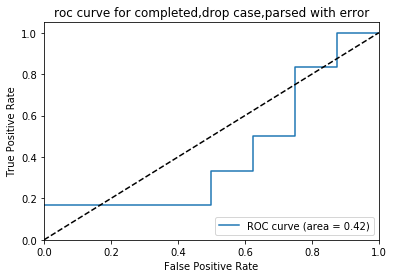

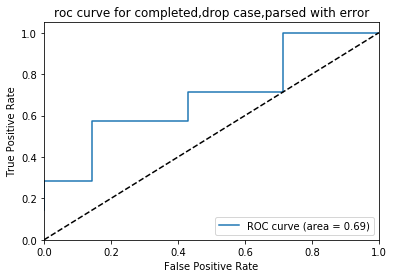

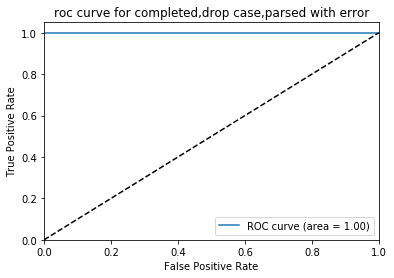

In [3]:
 from sklearn.metrics import roc_curve, auc
from sklearn import datasets
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC
from sklearn.preprocessing import label_binarize
from sklearn.cross_validation import train_test_split
import matplotlib.pyplot as plt

dataset =pd.read_csv(r"E:\allresumes - Copy.csv")
print ("Dataset Shape: ",dataset.shape)
print ("Dataset : ",dataset.head())

X = dataset.iloc[:, 0:3].values  
y = dataset.iloc[:, 4].values 

y = label_binarize(y, classes=["completed","drop case","parsed with error"])
n_classes = 3

# shuffle and split training and test sets
X_train, X_test, y_train, y_test =\
    train_test_split(X, y, test_size=0.33, random_state=0)

# classifier
clf = OneVsRestClassifier(LinearSVC(random_state=0))
y_score = clf.fit(X_train, y_train).decision_function(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot of a ROC curve for a specific class
for i in range(n_classes):
    plt.figure()
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('roc curve for completed,drop case,parsed with error')
    plt.legend(loc="lower right")
    plt.show()
